##1. Ускорение преобразования Фурье

1.1

In [ ]:
import numpy as np
import random
import time

In [ ]:
num = np.random.rand(4096)

start_time = time.time()
result = np.fft.fft(num)
end_time = time.time()

print("Время выполнения FFT:", end_time - start_time, "секунд")

Время выполнения FFT: 0.0005011558532714844 секунд


1.2

In [ ]:
num1 = np.random.rand(4096)
num2 = np.random.rand(4096)

start_time = time.time()
result1 = np.fft.fft(num1)
result2 = np.fft.fft(num2)
end_time = time.time()

print("Время выполнения FFT:", end_time - start_time, "секунд")

Время выполнения FFT: 0.0010251998901367188 секунд


1.3

Программа для замера времени выполнения каждого из потоков

In [ ]:
import threading

def perform_fft(sequence, thread_id):
    start_time = time.time()
    result = np.fft.fft(sequence)
    end_time = time.time()
    print(f"Поток {thread_id}\nВремя выполнения FFT: {end_time - start_time} с\n")
    return result

# Генерация случайных последовательностей
num1 = np.random.rand(4096)
num2 = np.random.rand(4096)

# Создаем потоки
thread1 = threading.Thread(target=perform_fft, args=(num1, 1))
thread2 = threading.Thread(target=perform_fft, args=(num2, 2))

thread1.start()
thread2.start()
thread1.join()
thread2.join()



Поток 1
Время выполнения FFT: 0.000308990478515625 с

Поток 2
Время выполнения FFT: 0.00033783912658691406 с



Программа для замера времени выполнения программы в целом (программы разделены, тк  print замедляет выполнение функции)

In [ ]:
def perform_fft(sequence, thread_id):
    result = np.fft.fft(sequence)
    return result

# Генерация случайных последовательностей
num1 = np.random.rand(4096)
num2 = np.random.rand(4096)

# Создаем потоки
thread1 = threading.Thread(target=perform_fft, args=(num1, 1))
thread2 = threading.Thread(target=perform_fft, args=(num2, 2))

program_start_time = time.time()
thread1.start()
thread2.start()
thread1.join()
thread2.join()
program_end_time = time.time()

print(f"Общее время выполнения программы: {program_end_time - program_start_time:} с")

Общее время выполнения программы: 0.0015728473663330078 с


##Вывод:
Время последовательного выполнения преобразования Фурье над двумя случайными последовательностями составило 0.0010251998901367188 с, что приблизительно в 2 раза превышает время выполнения одного преобразования Фурье.
Время выполнения Фурье-преобразования над двумя последовательностями из 4096 случаных чисел, при обработке каждой последовательности в отдельном потоке оказалось немного выше аналогичного значения для пункта 1.2. Возможное объяснение этому заключается в том, что из-за Python Global Interpreter Lock (GIL), при использовании многопоточности для вычисления чисто процессорного кода Python общее время обработки не сокращается. Официальная документация объясняет это тем, что GIL препятствует одновременному выполнению потоков, что приводит к неполному использованию процессора.

##2. Ускорение ожидания преобразования Фурье

2.1

In [ ]:
num = np.random.rand(4096)

start_time = time.time()
result = np.fft.fft(num)
time.sleep(2)
end_time = time.time()

print("Общее время выполнения программы:", end_time - start_time, "секунд")

Общее время выполнения программы: 2.003744125366211 секунд


2.2

Программа для замера времени выполнения каждого из потоков

In [ ]:
def perform_fft_with_sleep(sequence, thread_id):
    start_time = time.time()
    fft_result = np.fft.fft(sequence)
    time.sleep(2)
    end_time = time.time()
    print(f"Поток {thread_id}\nВремя выполнения FFT с ожиданием: {end_time - start_time:} с")
    return fft_result

def perform_fft_without_sleep(sequence, thread_id):
    start_time = time.time()
    fft_result = np.fft.fft(sequence)
    end_time = time.time()
    print(f"Поток {thread_id}\nВремя выполнения FFT без ожидания: {end_time - start_time:} с")
    return fft_result

sequence1 = np.random.rand(4096)
sequence2 = np.random.rand(4096)

thread1 = threading.Thread(target=perform_fft_with_sleep, args=(sequence1, 1))
thread2 = threading.Thread(target=perform_fft_without_sleep, args=(sequence2, 2))

thread1.start()
thread2.start()

thread1.join()
thread2.join()

Поток 2
Время выполнения FFT без ожидания: 0.0002357959747314453 с
Поток 1
Время выполнения FFT с ожиданием: 2.0023374557495117 с


Программа для замера времени выполнения программы в целом

In [ ]:
def perform_fft_with_sleep(sequence, thread_id):
  fft_result = np.fft.fft(sequence)
  time.sleep(2)
  return fft_result

def perform_fft_without_sleep(sequence, thread_id):
  fft_result = np.fft.fft(sequence)
  return fft_result

# Генерация случайных последовательностей
num1 = np.random.rand(4096)
num2 = np.random.rand(4096)

thread1 = threading.Thread(target=perform_fft_with_sleep, args=(sequence1, 1))
thread2 = threading.Thread(target=perform_fft_without_sleep, args=(sequence2, 2))

program_start_time = time.time()

thread1.start()
thread2.start()
thread1.join()
thread2.join()

program_end_time = time.time()
print(f"Общее время выполнения программы: {program_end_time - program_start_time:} с")

Общее время выполнения программы: 2.0029261112213135 с


##Вывод:
Замеры времени:
Время исполнения программы 2.1:  2.00374 с

Время исполнения программы 2.2 (многопоточная): 2.002926 с

Время исполнения потока без ожидания: 0.0002357 с

Время исполнения потока с ожиданием: 2.0023375 с

В первом случае (2.1) программа выполняет преобразование Фурье, а затем ожидает 2 секунды. Общее время выполнения будет включать время на вычисление преобразования Фурье плюс 2 секунды ожидания.
Во втором случае (2.2) программа запускает два потока параллельно. Первый поток выполняет преобразование Фурье и затем ожидает 2 секунды, а второй поток только выполняет преобразование Фурье. Время выполнения первого потока будет аналогично времени выполнения в первом случае. Второй поток завершится быстрее, поскольку он не содержит задержки. Общее время выполнения программы будет примерно равно времени выполнения первого потока, так как второй поток завершится раньше.

## 3. Исследуем объем используемой динамической памяти



In [ ]:
# gc.collect()

24488

3.1

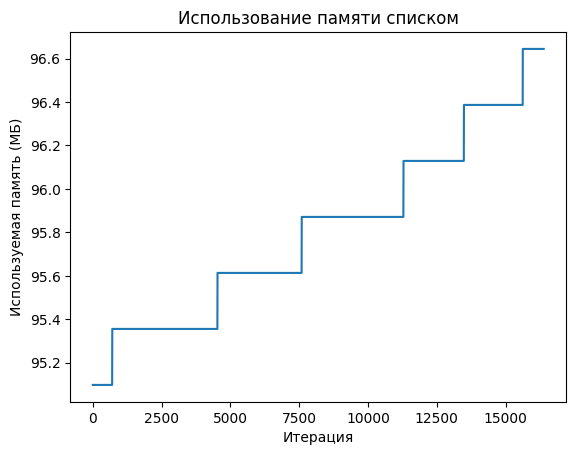

In [ ]:
import psutil
import os
import gc
import matplotlib.pyplot as plt

process = psutil.Process(os.getpid())

data_list = []
memory_usage_list = []
memory_usage = process.memory_info().rss / 1024 ** 2  # Память в мб
memory_usage_list.append(memory_usage)

# Заполнение списка и замер памяти
for i in range(1, 16385):
    data_list.append(i)
    memory_usage = process.memory_info().rss / 1024 ** 2  # Память в мб
    memory_usage_list.append(memory_usage)

plt.plot(range(0, 16385), memory_usage_list)
plt.xlabel('Итерация')
plt.ylabel('Используемая память (МБ)')
plt.title('Использование памяти списком')
plt.show()


3.2

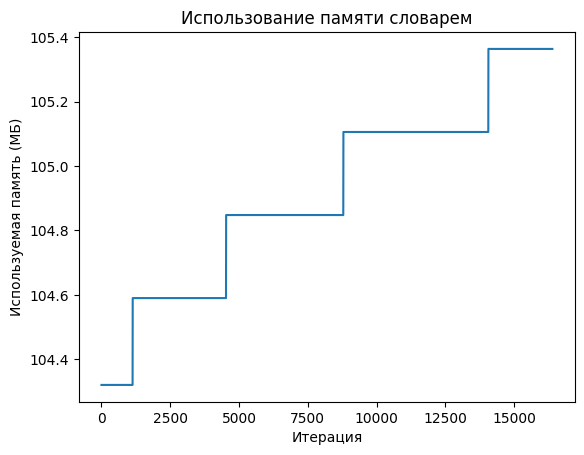

In [ ]:
import random

process = psutil.Process(os.getpid())

data_dict = {}
memory_usage_dict = []
memory_usage = process.memory_info().rss / 1024 ** 2  # Память в мб
memory_usage_dict.append(memory_usage)

for i in range(1, 16385):
    key = random.randint(1, 10000)
    value = random.randint(1, 10000)
    data_dict[key] = value
    memory_usage = process.memory_info().rss / 1024 ** 2  # Память в мб
    memory_usage_dict.append(memory_usage)

plt.plot(range(0, 16385), memory_usage_dict)
plt.xlabel('Итерация')
plt.ylabel('Используемая память (МБ)')
plt.title('Использование памяти словарем')
plt.show()


##Вывод:
В обоих случаях память увеличивается по мере добавления элементов, но не линейно, а скачкообразно.
Размер листа и словаря был увеличен в 4 раза, для получения более показательных результатов (в случай 4096 элементов график представляет собой горизонтальную прямую)

Список: Python выделяет память не для каждого нового элемента, а блоками, чтобы уменьшить количество операций по выделению памяти. append работает следующим образом: в зависимости от уже присутствующего в списке количества элементов он заранее резервирует больше памяти при добавлении элемента. Дополнительно выделяемый объем памяти не всегда увеличивает список вдвое. Может быть выделено место всего под несколько элементов. Это позволяет избежать затрат на изменение размера списка при частых вызовах append. При этом неиспользуемая, но уже выделенная, память недоступна для чтения.

Словарь:  При создании словаря выделяется место под несколько элементов, а не только после добавления элемента, как это было со списком. Таким образом, пустой словарь занимает больше места. Как и со списком, на каждую новую пару ключ-значение весь объект не перемещается в новый блок. Чтобы избежать частых затрат на перемещение, новый блок берется с запасом на несколько элементов.

## 4. Переполняем стек вызовов

Заполнение через рекурсию

In [ ]:
import time
import inspect
import pandas as pd

stack_size = []
result = []
def recursive_fill(n, result, stack_size):
  while n>0:
    result.append(n)
    current_stack_size = len(inspect.stack())
    stack_size.append(current_stack_size)
    return recursive_fill(n-1, result, stack_size)
  return stack_size

start_time = time.time()
stack_sizes = recursive_fill(4096, result, stack_size)
end_time = time.time()
duration = end_time - start_time

df_stack_sizes = pd.DataFrame({'Итерация': range(1, 4097), 'Размер стека': stack_sizes})
df_stack_sizes.head()
df_stack_sizes.tail()

print(f"Время выполнения рекурсивного заполнения: {duration:} с")

RecursionError: maximum recursion depth exceeded while calling a Python object

In [1]:
import sys
sys.getrecursionlimit()

1000

Заполнение через цикл

In [3]:
import time
def list_fill(n):
    result = []
    for i in range(1, n+1):
        result.append(i)
    return result

start_time = time.time()
iterative_list = list_fill(4096)
end_time = time.time()
cicle_duration = end_time - start_time

print(f"Время выполнения заполнения с использованием циклов: {cicle_duration:} с")


Время выполнения заполнения с использованием циклов: 0.0005979537963867188 с


##Вывод:
Ошибка при использовании рекурсии вызвана ограничением её глубины (максимального количества уровней рекурсивных вызовов). В данном случае глубина рекурсии ограничена значением 1000. Ограничение глубины рекурсии помогает предотвратить переполнение стека вызовов, что может привести к сбоям программы.

Можно предположить, что время выполнения программы для 4096 элементов превысит 60 минут, тк 1000 вызовов функции заняла более 20 минут. Исходя из этого было приняло решение не увеличивать ограничение глубины рекурсии.

Время выполнения программы с использованием цикла составило 0.00059795 с.

Таким образом, накладные расходы по времени на вызов функций и работу со стеком вызовов могут существенно влиять на производительность, особенно при больших количествах рекурсивных вызовов. Использование циклов для таких задач является более эффективным и предпочтительным подходом.